In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:

df = pd.read_csv(r'C:\Users\ishaa\OneDrive\Documents\PROJECTS\hotel_DA\Hotel_booking_data.csv')


In [21]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [24]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [25]:
df.shape


(119390, 31)

In [26]:
df['reservation_status_date'].dtype

dtype('O')

# Data cleaning

In [79]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)


In [80]:
df['reservation_status_date'].dtype

dtype('<M8[ns]')

In [81]:
df.info(['reservation_status_date'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  int64         
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  int64         
 4   arrival_date_month              119389 non-null  object        
 5   arrival_date_week_number        119389 non-null  int64         
 6   arrival_date_day_of_month       119389 non-null  int64         
 7   stays_in_weekend_nights         119389 non-null  int64         
 8   stays_in_week_nights            119389 non-null  int64         
 9   adults                          119389 non-null  int64         
 10  babies                          119389 non-null  int64  

In [82]:
df.describe(include=object)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389
unique,2,12,5,8,5,10,12,3,4,3
top,City Hotel,August,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79329,13877,92309,56477,97869,85993,74052,104641,89612,75166


# Overview of unique data in each column

In [83]:
for col in df.describe(include=object).columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
market_segment
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
--------------------------------------------------
distribution_channel
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
--------------------------------------------------
reserved_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
--------------------------------------------------
assigned_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
--------------------------------------------------
deposit_type
['No Deposit' 'Refundable' 'Non Refund']
--------------------------------------------------
customer_type
['

In [84]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  int64         
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  int64         
 4   arrival_date_month              119389 non-null  object        
 5   arrival_date_week_number        119389 non-null  int64         
 6   arrival_date_day_of_month       119389 non-null  int64         
 7   stays_in_weekend_nights         119389 non-null  int64         
 8   stays_in_week_nights            119389 non-null  int64         
 9   adults                          119389 non-null  int64         
 10  babies                          119389 non-null  int64  

In [87]:
df.describe(include=object)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389
unique,2,12,5,8,5,10,12,3,4,3
top,City Hotel,August,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79329,13877,92309,56477,97869,85993,74052,104641,89612,75166


In [88]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.007949,0.031912,0.087119,0.137098,0.221118,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.097437,0.175768,0.844340,1.497443,0.652304,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


In [89]:
df=df[df['adr']<5000]

In [90]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.007949,0.031912,0.087119,0.137098,0.221118,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.097437,0.175768,0.844340,1.497443,0.652304,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


<Axes: >

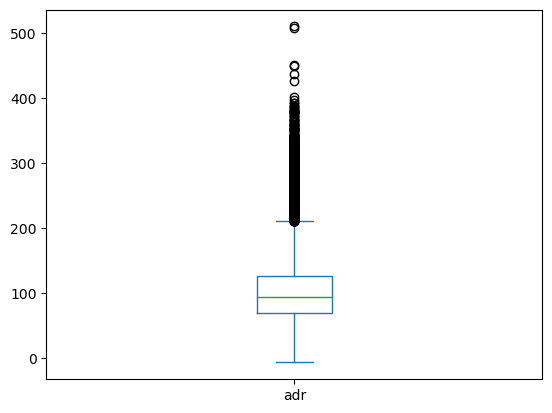

In [91]:
df.adr.plot(kind='box')

# Analysing data

In [92]:
cancelled_perc = df['is_canceled'].value_counts()
cancelled_perc

0    75166
1    44223
Name: is_canceled, dtype: int64

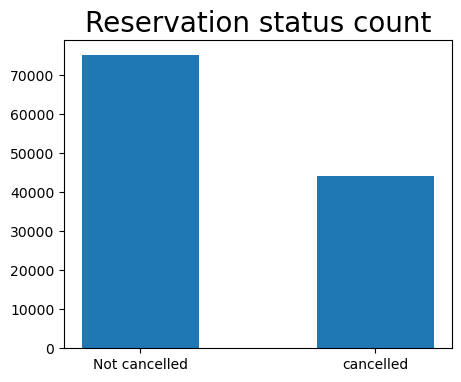

In [93]:
plt.figure(figsize=(5,4))
plt.title('Reservation status count',fontsize=20)
plt.bar(['Not cancelled','cancelled'],df['is_canceled'].value_counts(),width=.5)
plt.show()

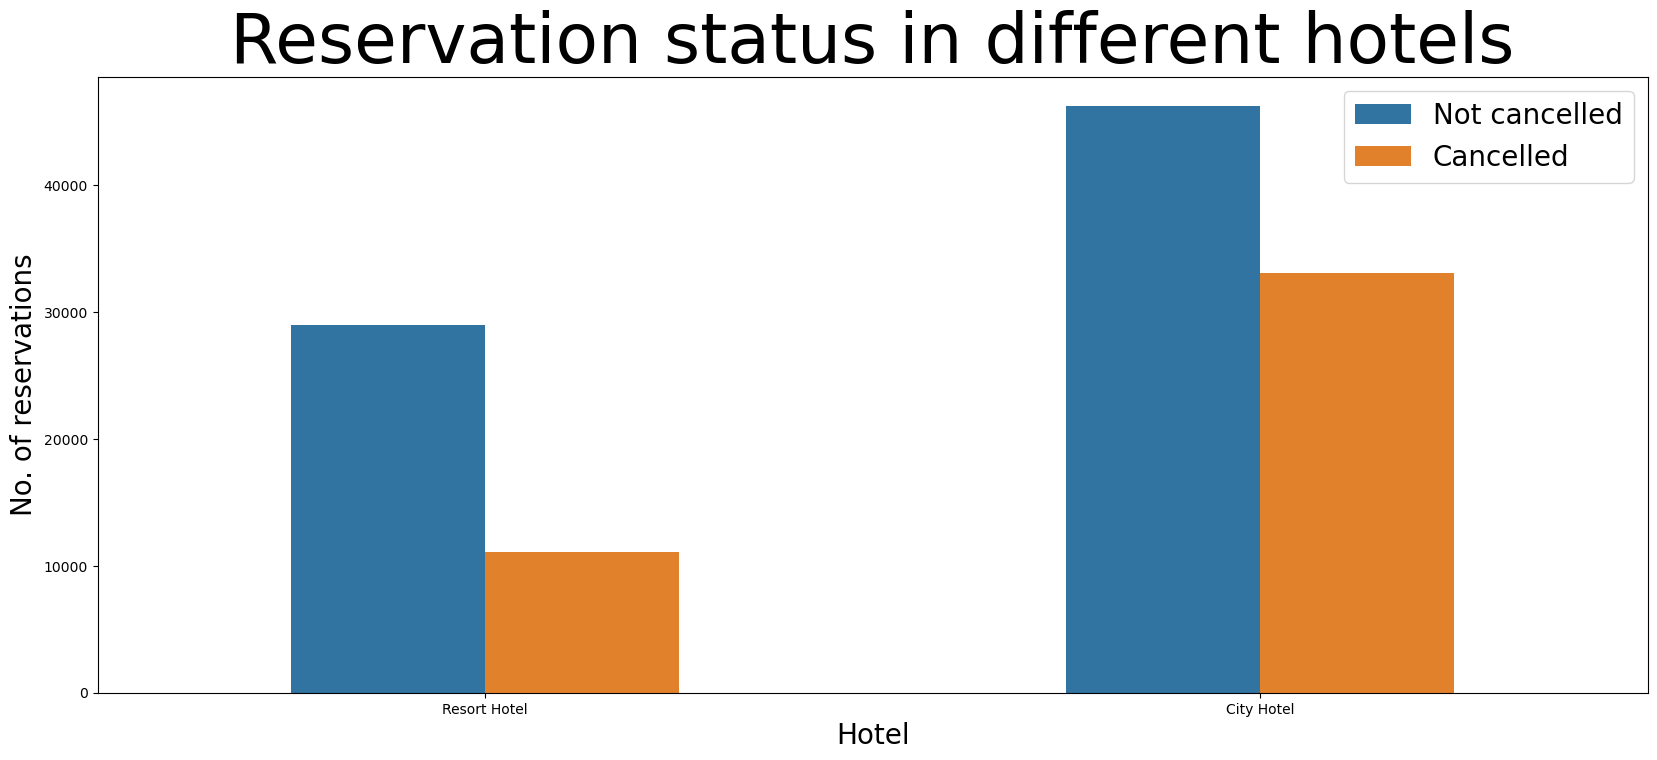

In [94]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='hotel',hue='is_canceled',width=0.5)
plt.title('Reservation status in different hotels',fontsize = 50)
plt.xlabel('Hotel',fontsize = 20)
plt.ylabel('No. of reservations',fontsize = 20)
plt.legend(['Not cancelled','Cancelled'],fontsize = 20)
plt.show()

In [95]:
resort_hotel = df[df.hotel == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [96]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582738
1    0.417262
Name: is_canceled, dtype: float64

# Comparing ADR

CITY HOTEL VS RESORT HOTEL

In [97]:
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()

In [98]:
city_hotel.head()

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-05,58.900000
2015-01-06,69.216667
2015-01-07,82.877500


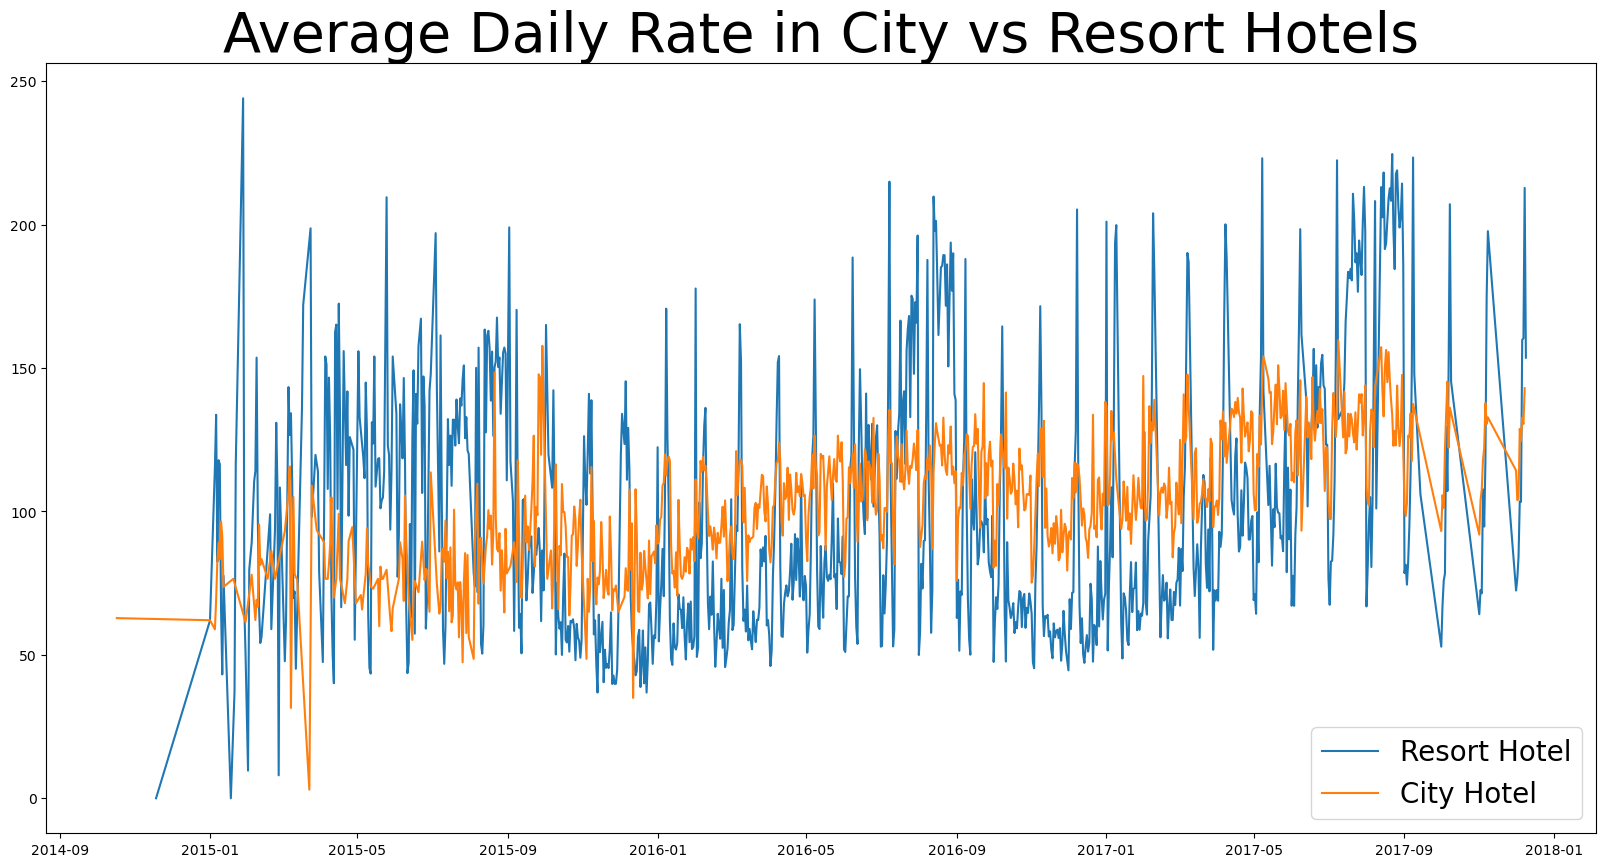

In [99]:
plt.figure(figsize=(20,10))

plt.title('Average Daily Rate in City vs Resort Hotels', fontsize=40)


plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize = 20)

plt.show()

# ADR


In [100]:
canceled_data = df[df['is_canceled'] == 1]
canceled_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-06-05
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-11-05
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,K,1,No Deposit,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-06
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,D,0,No Deposit,0,Transient,65.0,0,0,No-Show,2017-07-17


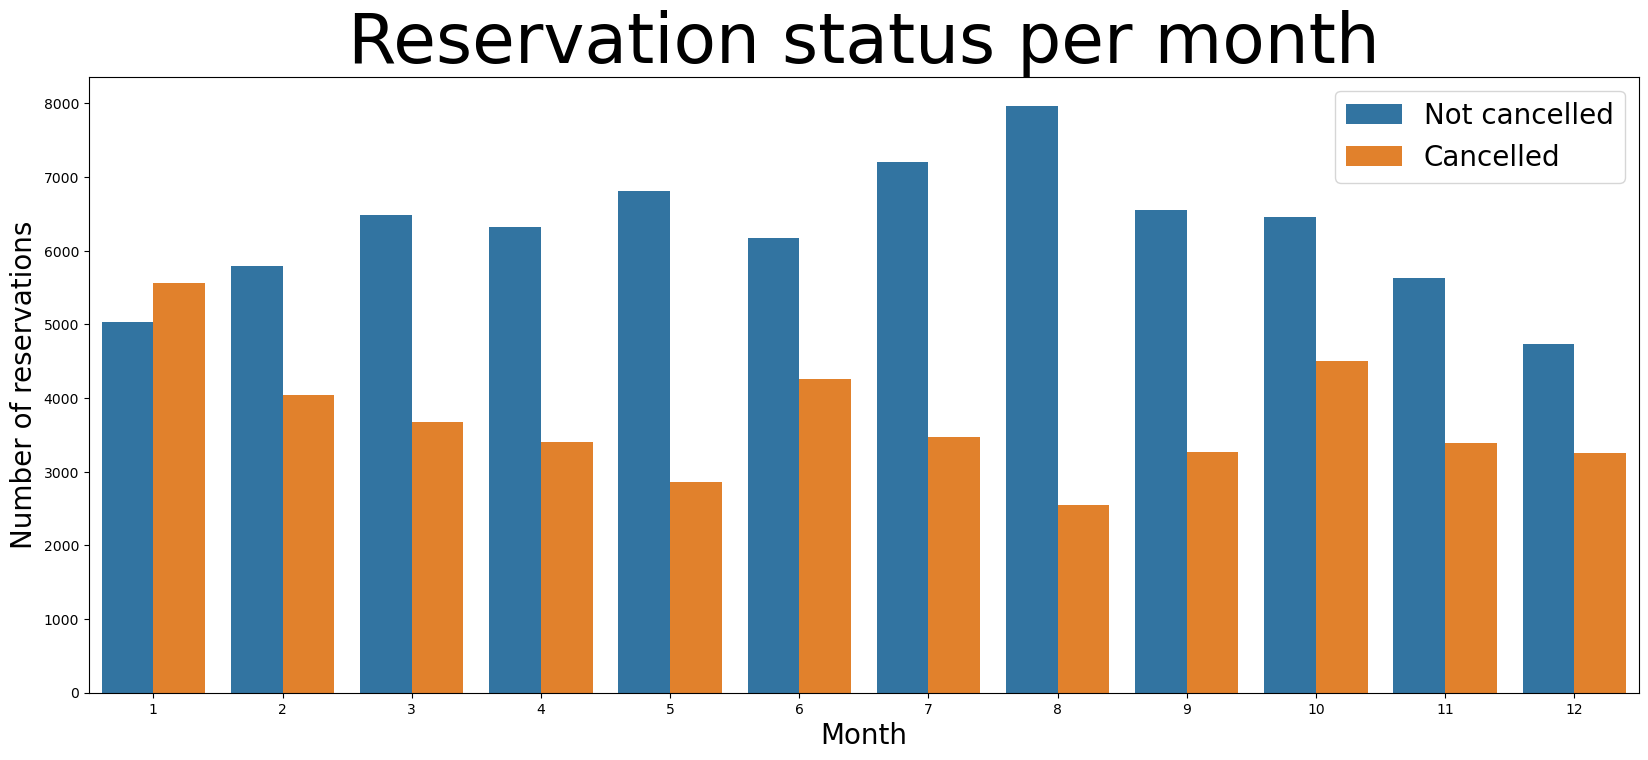

In [101]:
df_copy = df.copy()

df_copy.loc[:, 'month'] = pd.to_datetime(df_copy['reservation_status_date']).dt.month

plt.figure(figsize=(20,8))
sns.countplot(x = 'month', hue = 'is_canceled', data = df_copy )


plt.title('Reservation status per month', fontsize = 50)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Number of reservations', fontsize = 20)
plt.legend(['Not cancelled', 'Cancelled'] , fontsize = 20)
plt.show()

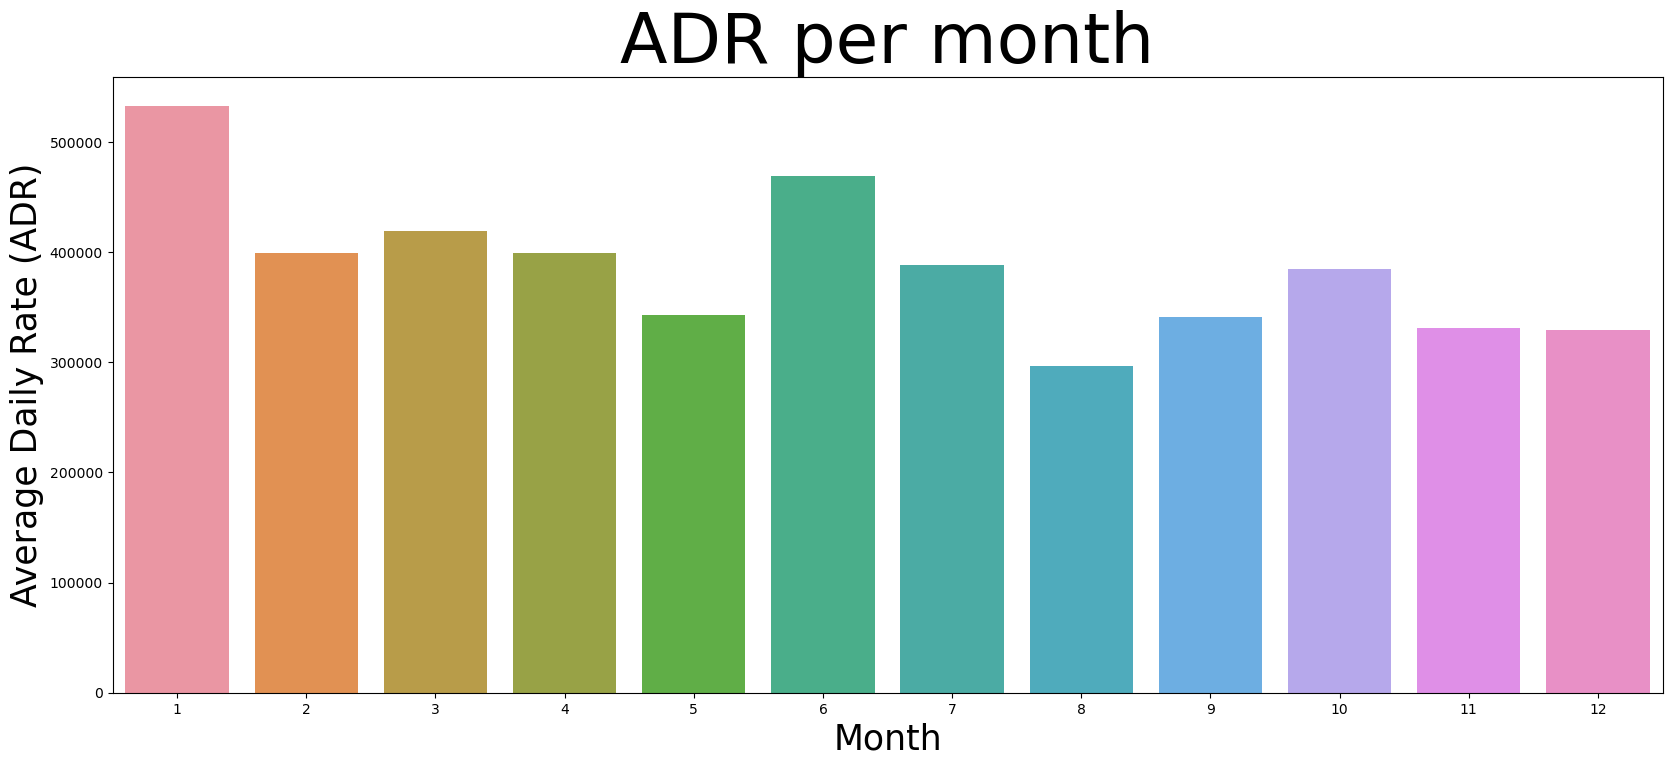

In [102]:
plt.figure(figsize = (20,8))
plt.title('ADR per month', fontsize = 50)
df_filtered = df_copy[df_copy['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()

sns.barplot(x='month', y='adr', data = df_filtered)
plt.xlabel('Month',fontsize = 25)
plt.ylabel('Average Daily Rate (ADR)',fontsize = 25)
plt.show()

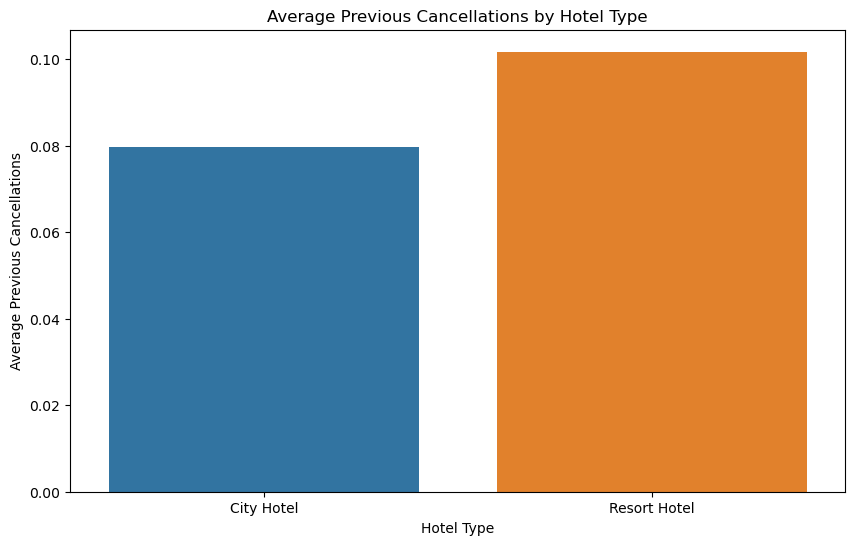

In [103]:
grouped = df.groupby('hotel')['previous_cancellations'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='previous_cancellations', data=grouped)
plt.title('Average Previous Cancellations by Hotel Type')
plt.ylabel('Average Previous Cancellations')
plt.xlabel('Hotel Type')
plt.show()

In [106]:
# Group by 'is_repeated_guest' and compute the mean cancellation rate
cancellation_rate = df.groupby('is_repeated_guest')['is_canceled'].mean()

print(cancellation_rate)


is_repeated_guest
0    0.377845
1    0.144882
Name: is_canceled, dtype: float64


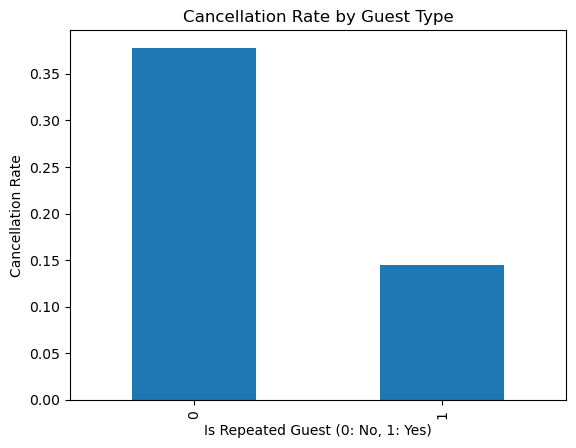

In [107]:
import matplotlib.pyplot as plt

cancellation_rate.plot(kind='bar')
plt.ylabel('Cancellation Rate')
plt.xlabel('Is Repeated Guest (0: No, 1: Yes)')
plt.title('Cancellation Rate by Guest Type')
plt.show()


In [113]:
market_analysis = df.groupby('market_segment').agg(
    total_bookings=('is_canceled', 'size'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

market_analysis['cancellation_rate'] = market_analysis['total_cancellations'] / market_analysis['total_bookings']
print(market_analysis)


  market_segment  total_bookings  total_cancellations  cancellation_rate
0       Aviation             237                   52           0.219409
1  Complementary             743                   97           0.130552
2      Corporate            5295                  992           0.187347
3         Direct           12606                 1934           0.153419
4         Groups           19811                12097           0.610620
5  Offline TA/TO           24218                 8310           0.343133
6      Online TA           56477                20739           0.367211
7      Undefined               2                    2           1.000000


In [114]:
channel_analysis = df.groupby('distribution_channel').agg(
    total_bookings=('is_canceled', 'size'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

channel_analysis['cancellation_rate'] = channel_analysis['total_cancellations'] / channel_analysis['total_bookings']
print(channel_analysis)



  distribution_channel  total_bookings  total_cancellations  cancellation_rate
0            Corporate            6677                 1474           0.220758
1               Direct           14645                 2557           0.174599
2                  GDS             193                   37           0.191710
3                TA/TO           97869                40151           0.410252
4            Undefined               5                    4           0.800000


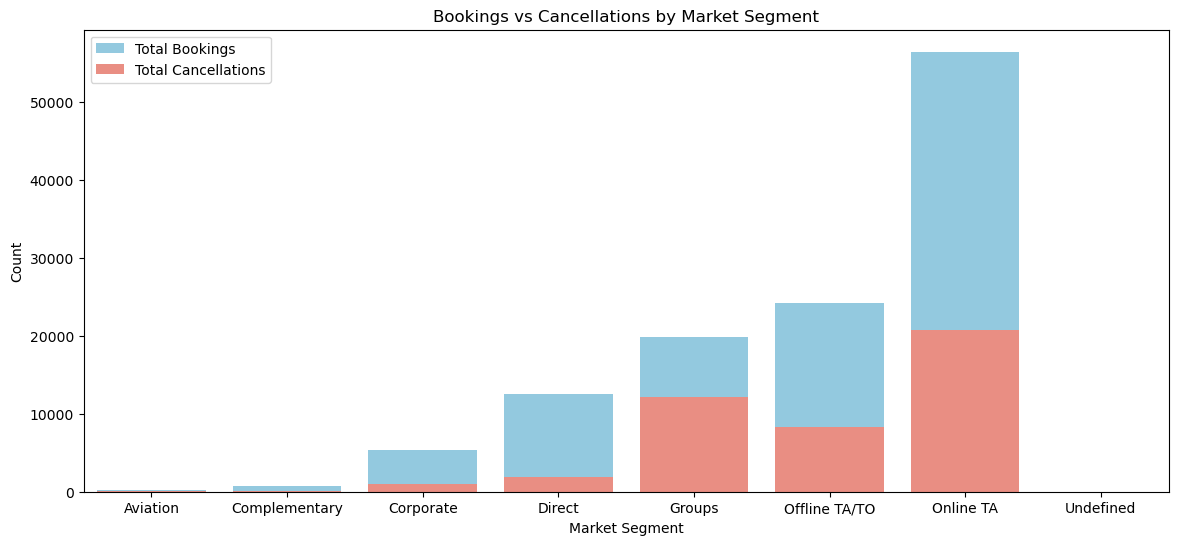

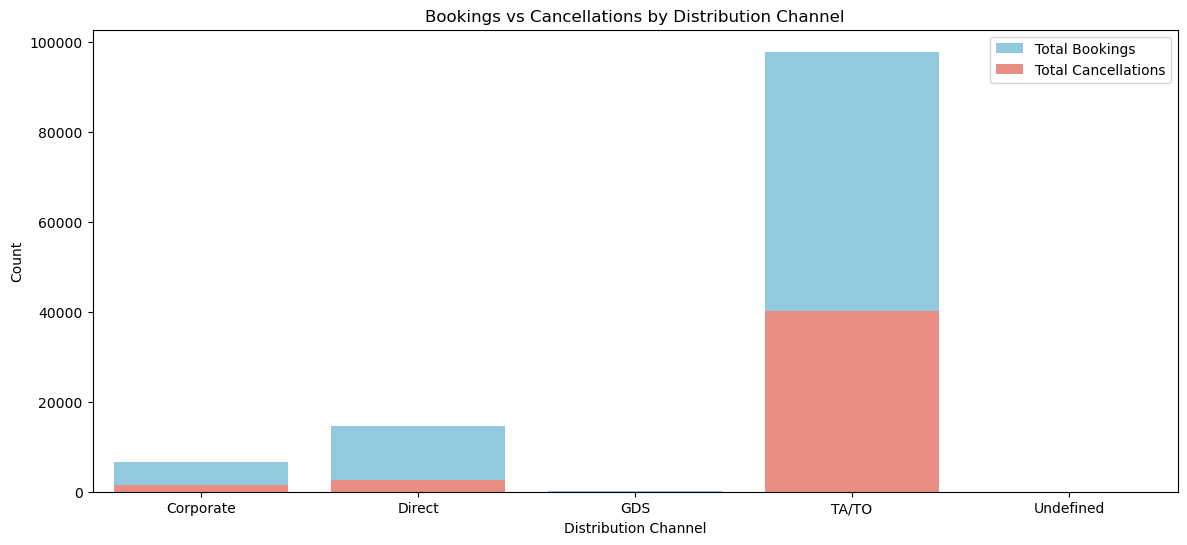

In [115]:

# Market Segment Analysis
plt.figure(figsize=(14, 6))
sns.barplot(x='market_segment', y='total_bookings', data=market_analysis, label='Total Bookings', color='skyblue')
sns.barplot(x='market_segment', y='total_cancellations', data=market_analysis, label='Total Cancellations', color='salmon')
plt.title('Bookings vs Cancellations by Market Segment')
plt.ylabel('Count')
plt.xlabel('Market Segment')
plt.legend()
plt.show()

# Distribution Channel Analysis
plt.figure(figsize=(14, 6))
sns.barplot(x='distribution_channel', y='total_bookings', data=channel_analysis, label='Total Bookings', color='skyblue')
sns.barplot(x='distribution_channel', y='total_cancellations', data=channel_analysis, label='Total Cancellations', color='salmon')
plt.title('Bookings vs Cancellations by Distribution Channel')
plt.ylabel('Count')
plt.xlabel('Distribution Channel')
plt.legend()
plt.show()
